# EEG Analysis - Robotto

## Loading Packages and downloading data

In [4]:
# remember to pip install mne in terminal if you work in uCloud
import os
import numpy as np
import mne
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 

In [5]:
raw = mne.io.read_raw_brainvision("Group2_own.vhdr", eog=("EOG1","EOG2"))

Extracting parameters from Group2_own.vhdr...
Setting channel info structure...


In [6]:
raw.load_data()

Reading 0 ... 617399  =      0.000 ...   617.399 secs...


<RawBrainVision | Group2_own.eeg, 32 x 617400 (617.4 s), ~150.8 MB, data loaded>

Sampling frequency: 1000 Hz
30 channels

In [7]:
#Setting the montage:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)

<RawBrainVision | Group2_own.eeg, 32 x 617400 (617.4 s), ~150.8 MB, data loaded>

In [8]:
# Redefine the reference to a common average:
raw.set_eeg_reference('average', projection=False, verbose=False)

<RawBrainVision | Group2_own.eeg, 32 x 617400 (617.4 s), ~150.8 MB, data loaded>

## Plotting

Using matplotlib as 2D backend.
Opening raw-browser...


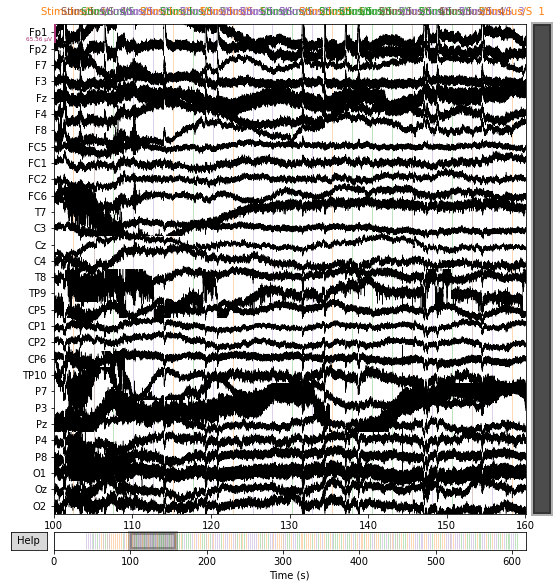

In [9]:
# Plot your raw data
raw.pick_types(meg=False, eeg=True) # selecting only EEG and stimulus data & plotting raw data
raw.plot(scalings="auto", n_channels=32, duration=60, start=100);

## Filtering

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 sec)

Opening raw-browser...


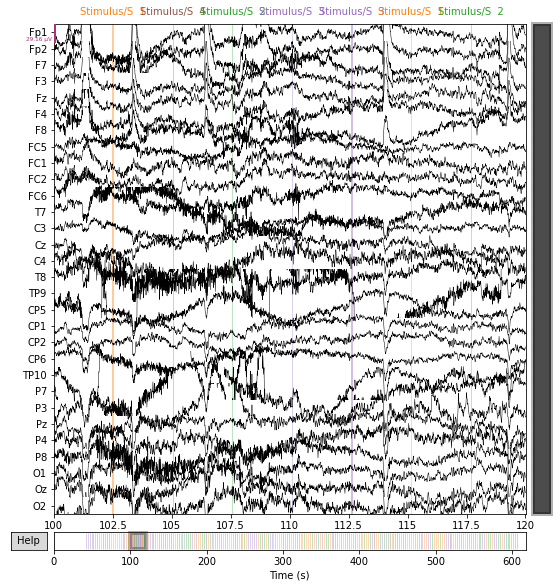

In [10]:
# high-pass filtering the data at 0.1 Hz and subsequently low-pass filtering at 40 Hz
raw = raw.filter(0.1, None)
raw = raw.filter(None, 40)

# plotting the filtered data for inspection
raw.plot(scalings="auto", n_channels=32, duration=20, start=100);

## Event IDs and annotations

#### Using the mne package we can define our events from our trickers (aka. annotations)

In [11]:
# defining events
events,_ = mne.events_from_annotations(raw)
np.unique(events[:,2])

# making a name list
event_id = {'Human': 1, # positive word
            'Robot': 2, # waiting time after positive word
            'Animal': 3, # positive image (always following pos word)
            'Chair': 4, # negative word
}

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4']


/tmp/ipykernel_351/1995680446.py:1: RuntimeWarning: event 99999 missing from event_id will be ignored
  mne.viz.plot_events(events, sfreq=1000, first_samp=raw.first_samp, event_id=event_id);


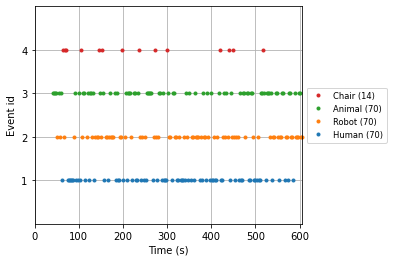

In [12]:
mne.viz.plot_events(events, sfreq=1000, first_samp=raw.first_samp, event_id=event_id);

## Epoch Preprocessing

In [13]:
# establishing time window for our epoch
tmin, tmax = -0.1, 0.5

# choosing only EEG channels for epoching
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# rejecting all above and below 150 microvolt (because any signal above and below these limits are NOT brain activity)
reject = dict(eeg=150e-6)

In [14]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=(None, 0), reject=reject, preload=True)

# downsampling to 250 Hz
epochs_resampled = epochs.resample(250)

Not setting metadata
224 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 224 events and 601 original time points ...
    Rejecting  epoch based on EEG : ['TP10']
    Rejecting  epoch based on EEG : ['TP10']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F7']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
15 bad 

Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


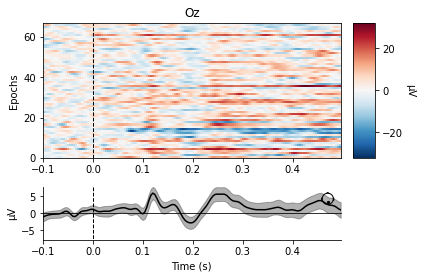

Not setting metadata
63 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


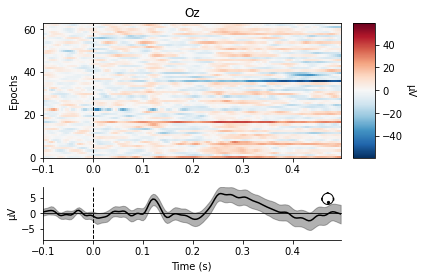

Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


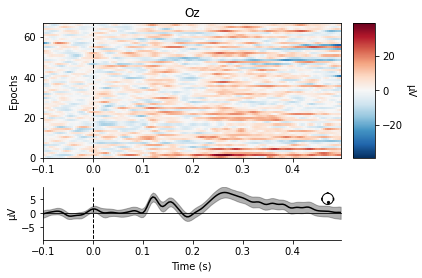

Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


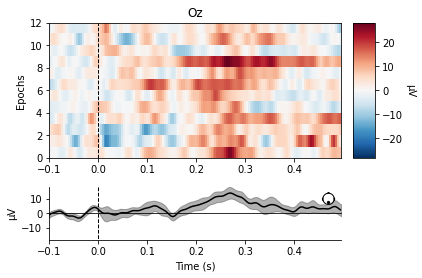

In [15]:
# that way we don't have to specify 'auditory_left' and 'auditory_right' etc.
Human_epochs = epochs_resampled['Human'] 
Animal_epochs = epochs_resampled['Animal'] 
Robot_epochs = epochs_resampled['Robot'] 
Chair_epochs = epochs_resampled['Chair'] 


# plotting one channel as an example for each modality
Human_epochs.plot_image(picks=['Oz']);
Animal_epochs.plot_image(picks=['Oz']);
Robot_epochs.plot_image(picks=['Oz']);
Chair_epochs.plot_image(picks=['Oz']);

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


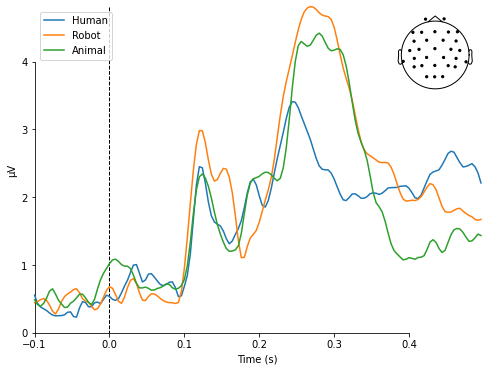

[<Figure size 576x432 with 2 Axes>]

In [16]:
# creating evokeds for Correct/wNeu/iPos condition by averaging over epochs
Human_evoked = Human_epochs.average() 
Robot_evoked = Robot_epochs.average() 
Animal_evoked = Animal_epochs.average()

mne.viz.plot_compare_evokeds(dict(Human=Human_evoked, Robot=Robot_evoked, Animal=Animal_evoked),
                             legend='upper left', show_sensors='upper right')

No projector specified for this dataset. Please consider the method self.add_proj.


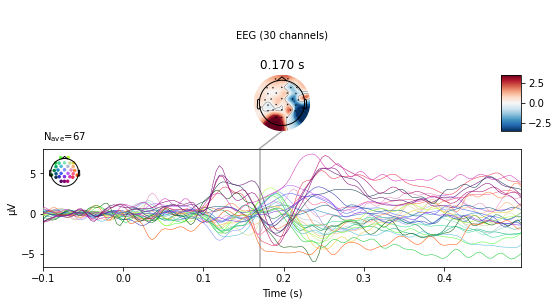

No projector specified for this dataset. Please consider the method self.add_proj.


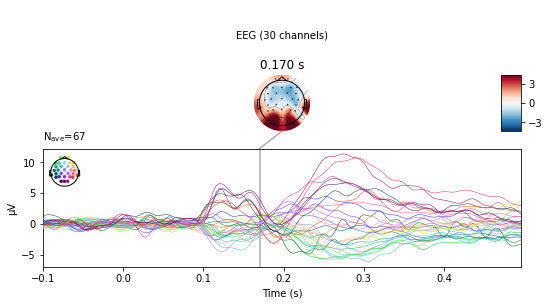

No projector specified for this dataset. Please consider the method self.add_proj.


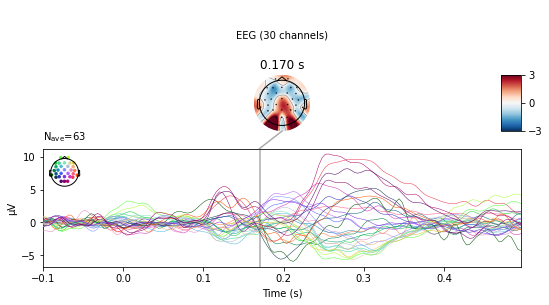

In [17]:
Human_evoked.plot_joint(picks='eeg', times=0.170);
Robot_evoked.plot_joint(picks='eeg', times=0.170);
Animal_evoked.plot_joint(picks='eeg', times=0.170);

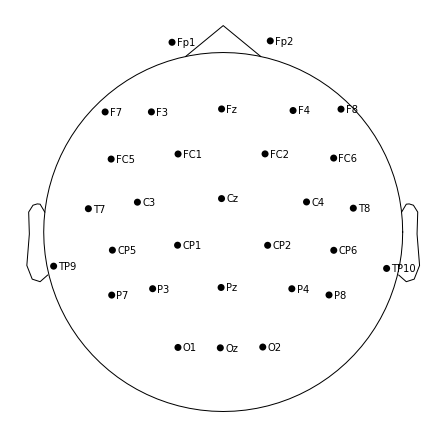

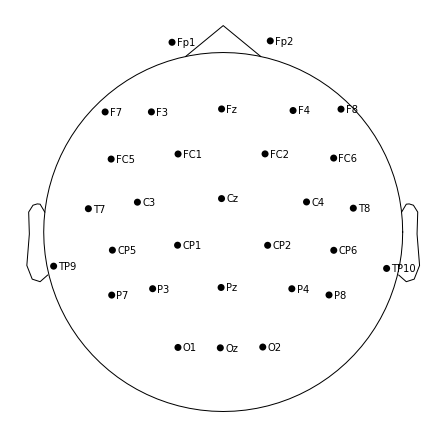

In [18]:
raw.plot_sensors(show_names=True)